# Education

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os.path
from sklearn.linear_model import LinearRegression 
from glob import glob

In [3]:
filepath = '../../data/final/education.csv'

In [4]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [5]:
df.head()

,Country,Host_City,Year,Education_Index,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
0,Afghanistan,Beijing,2008,0.332160,0,0,1,1,1,0.000000,0.000490,0.000248,0.000000,0.000000,0.000000
1,Afghanistan,London,2012,0.365333,0,0,1,1,1,0.000000,0.000514,0.000260,0.000000,0.000076,0.000036
2,Algeria,Atlanta,1996,0.438191,2,0,1,3,7,0.003252,0.001616,0.001894,0.006980,0.003573,0.004839
3,Algeria,Barcelone,1992,0.399180,1,0,1,2,4,0.001779,0.001168,0.001180,0.003819,0.002153,0.002740
4,Algeria,Beijing,2008,0.598080,0,1,1,2,3,0.000000,0.000981,0.000743,0.000000,0.001558,0.001457


## Education index

In [7]:
df.Education_Index.max()

0.92653551999999995

In [9]:
df[df.Education_Index == df.Education_Index.max()]

,Country,Host_City,Year,Education_Index,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
24,Australia,London,2012,0.926536,19,36,59,114,188,0.029968,0.058642,0.048895,0.064323,0.18468,0.143011


In [10]:
df.Education_Index.min()

0.15471595220000001

In [12]:
df[df.Education_Index == df.Education_Index.min()]

,Country,Host_City,Year,Education_Index,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
450,Mozambique,Atlanta,1996,0.154716,0,0,1,1,1,0.0,0.000539,0.000271,0.0,0.000153,0.000067


In [13]:
df.Education_Index.mean()

0.6688927346775495

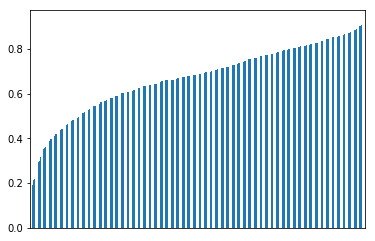

In [17]:
df.Education_Index.sort_values().plot(kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.show()

## Outliers

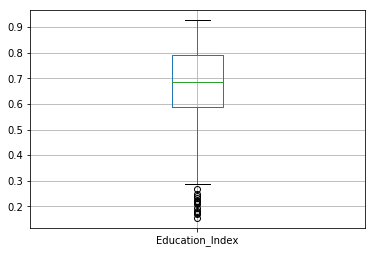

In [19]:
df[['Education_Index']].boxplot()
plt.show()

In [20]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [24]:
indexs = outliers_iqr(df.Education_Index)
df.iloc[indexs].Country.unique()

array(['Burundi', "Cote d'Ivoire", 'Ethiopia', 'India', 'Morocco',
       'Mozambique', 'Pakistan', 'Senegal', 'Uganda'], dtype=object)

## Education Index as a Factor

In [26]:
df.corr()

,Year,Education_Index,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
Year,1.000000,0.386809,-0.033669,-0.038931,-0.042259,-0.041422,-0.039238,-0.124696,-0.162646,-0.151046,-0.124696,-0.162646,-0.151046
Education_Index,0.386809,1.000000,0.173116,0.193453,0.209541,0.208211,0.198468,0.164326,0.209001,0.197459,0.164326,0.209001,0.197459
Gold,-0.033669,0.173116,1.000000,0.777137,0.730400,0.932572,0.966576,0.755064,0.688628,0.723895,0.755064,0.688628,0.723895
Silver,-0.038931,0.193453,0.777137,1.000000,0.735619,0.911668,0.900730,0.548473,0.677822,0.671086,0.548473,0.677822,0.671086
Bronze,-0.042259,0.209541,0.730400,0.735619,1.000000,0.889410,0.829889,0.474399,0.622380,0.563273,0.474399,0.622380,0.563273
Total_Medals,-0.041422,0.208211,0.932572,0.911668,0.889410,1.000000,0.991722,0.666213,0.728746,0.722554,0.666213,0.728746,0.722554
Ath_Rating,-0.039238,0.198468,0.966576,0.900730,0.829889,0.991722,1.000000,0.706050,0.728495,0.738923,0.706050,0.728495,0.738923
Gold_Share,-0.124696,0.164326,0.755064,0.548473,0.474399,0.666213,0.706050,1.000000,0.886866,0.944034,1.000000,0.886866,0.944034
Medal_Share,-0.162646,0.209001,0.688628,0.677822,0.622380,0.728746,0.728495,0.886866,1.000000,0.984697,0.886866,1.000000,0.984697
Rating_Share,-0.151046,0.197459,0.723895,0.671086,0.563273,0.722554,0.738923,0.944034,0.984697,1.000000,0.944034,0.984697,1.000000


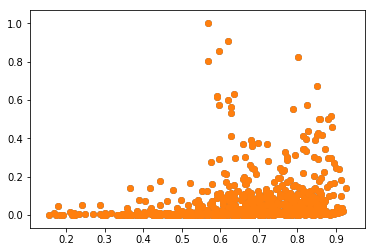

In [28]:
plt.scatter(df.Education_Index,df.norm_Rating_Share)
plt.show()

In [35]:
def standardScatterLine(x,y,ytitle,xtitle,title):
    plt.rcParams["figure.figsize"][0] = 12
    plt.rcParams["figure.figsize"][1] = 12
    x_nparray = (x.values).reshape(len(x), 1)
    y_nparray = (y.values).reshape(len(y), 1)
    
    regr = LinearRegression()
    regr.fit(x_nparray, y_nparray)
    
    fig, ax = plt.subplots()
    
    ax.plot(x_nparray, regr.predict(x_nparray), color='k', linewidth=4)
    ax.scatter(x,
                y,
                marker='o',
                facecolors='#228B22', 
                edgecolors='#228B22',
                )
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.show()

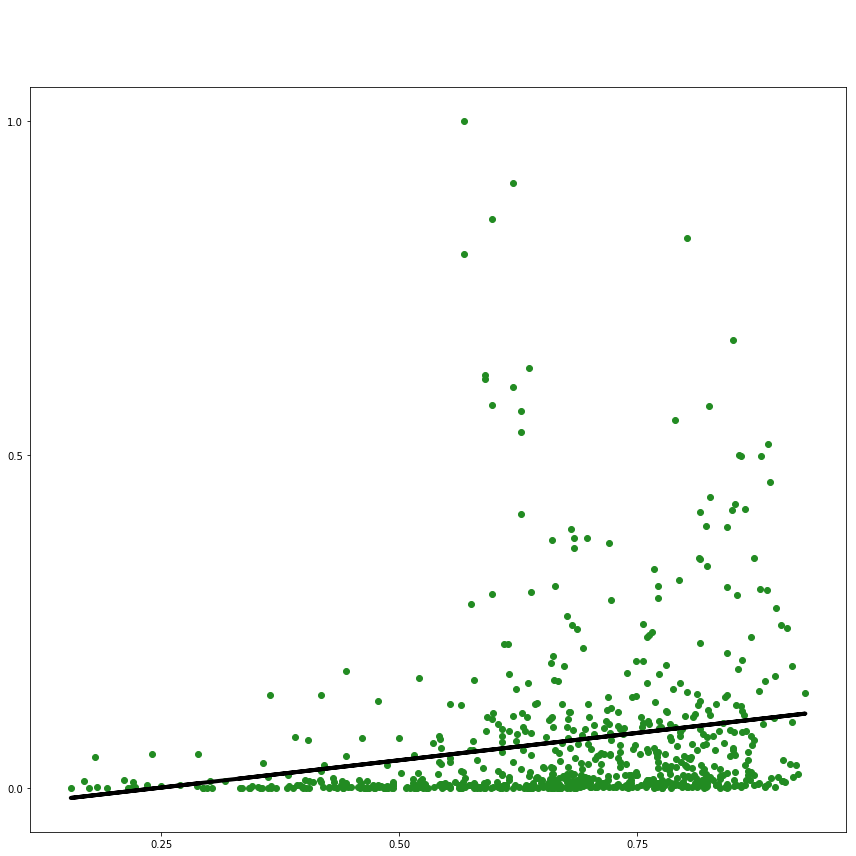

In [36]:
standardScatterLine(df.Education_Index,df.norm_Rating_Share,"",'','')

In [44]:
quartile_1, quartile_3 = np.percentile(df.Education_Index, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
temp = df[df.Education_Index > lower_bound]
temp.head()

,Country,Host_City,Year,Education_Index,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share
0,Afghanistan,Beijing,2008,0.332160,0,0,1,1,1,0.000000,0.000490,0.000248,0.000000,0.000000,0.000000
1,Afghanistan,London,2012,0.365333,0,0,1,1,1,0.000000,0.000514,0.000260,0.000000,0.000076,0.000036
2,Algeria,Atlanta,1996,0.438191,2,0,1,3,7,0.003252,0.001616,0.001894,0.006980,0.003573,0.004839
3,Algeria,Barcelone,1992,0.399180,1,0,1,2,4,0.001779,0.001168,0.001180,0.003819,0.002153,0.002740
4,Algeria,Beijing,2008,0.598080,0,1,1,2,3,0.000000,0.000981,0.000743,0.000000,0.001558,0.001457


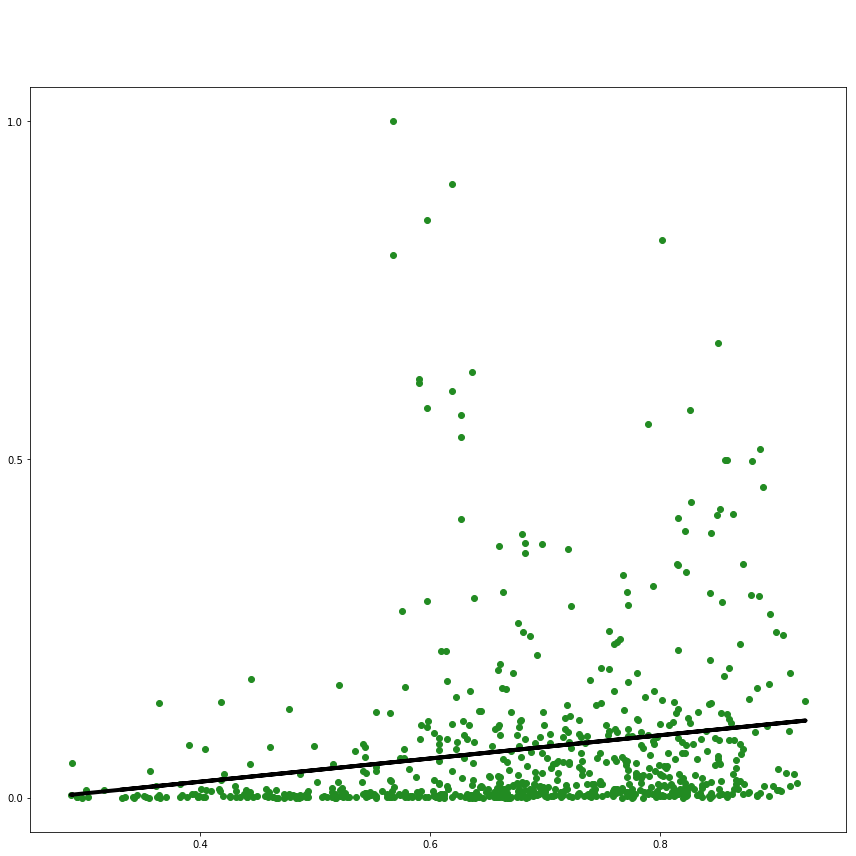

In [45]:
standardScatterLine(temp.Education_Index,temp.norm_Rating_Share,"",'','')

In [46]:
temp.norm_Rating_Share.corr(temp.Education_Index)

0.18711879048251334